# JST

In [1]:
import numpy as np

import pandas as pd
from pandarallel import pandarallel
from reviews.config import processed_data_dir, asum_input_dir, data_dir
from reviews.preprocess import preprocess
import matplotlib.pyplot as plt

pandarallel.initialize(progress_bar=True, nb_workers=8)


INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


## Generate Input Data

In [15]:
# prepare format of data input for JST
reviews_df = pd.read_json(
    processed_data_dir / "reviews_lemmatization.json.gz", orient="records"
)
reviews_df = reviews_df[:1000]

In [16]:
tokens = reviews_df['tokens']
func = lambda x:[item for sublist in list(x) for item in sublist]
tokens = [" ".join(func(token)) for token in tokens]

In [17]:
docs = list(tokens)
docs = [f"d{i} {x}" for i, x in enumerate(docs)]

docs_file = "\n".join(docs)

with open(data_dir / "jst" / "docs.dat", "w") as f:
    f.write(docs_file)

In [18]:
vocabs = [x for sublist in list(tokens) for x in sublist.split(" ")]

In [19]:
# count frequence of world
from collections import Counter
vocab_file = "\n".join([f"{k} {v}"  for (k, v) in dict(Counter(vocabs)).items()])

with open(data_dir / "jst" / "wordmap.txt", "w") as f:
    f.write(vocab_file)

## Run

In [8]:
# JST execution
from reviews.config import data_dir, bin_dir, out_dir
from reviews.models import JST

alpha = 0.1
beta = 0.001 # [0.001, 0.1, 0]
gamma = 1 #[1, 1]
n_topics = 20
iterations = 1000

model = JST(bin_dir, data_dir / "jst", out_dir / "jst")
model.estimate(alpha, beta, gamma, n_topics, iterations)

## prepare data for analysis

In [2]:
# columns name
columns_name = []
for x in range(3):
    for y in range(20):
        columns_name.append("S" + str(x) + "-T" + str(y))

In [4]:
# prepare phi file for analysis
with open(out_dir/ "jst" / "final.phi") as f:
    lines = f.readlines()

    phi = {}
    tmp = ""
    for i,line in enumerate(lines):
        if i % 2 != 0:
            phi[tmp] = [float(x.strip()) for x in line.split(" ") if x.strip() != ""]
        else:
            tmp = line.strip()

phi = pd.DataFrame(phi)
phi.columns = columns_name
phi

,S0-T0,S0-T1,S0-T2,S0-T3,S0-T4,S0-T5,S0-T6,S0-T7,S0-T8,S0-T9,...,S2-T10,S2-T11,S2-T12,S2-T13,S2-T14,S2-T15,S2-T16,S2-T17,S2-T18,S2-T19
0,1.098597e-06,1.918457e-06,2.299267e-02,8.269573e-07,1.750540e-06,1.864794e-06,1.834014e-06,1.019106e-06,2.313464e-06,1.090213e-06,...,1.657315e-06,1.967010e-06,2.181569e-06,2.270737e-06,1.722992e-06,1.881872e-06,1.425749e-06,7.951690e-02,2.186339e-06,1.690944e-06
1,5.492983e-08,9.592285e-08,3.107033e-08,4.134787e-08,8.752701e-08,9.323970e-08,9.170068e-08,5.095530e-08,1.156732e-07,5.451063e-08,...,8.286574e-08,9.835052e-08,1.090784e-07,1.135368e-07,8.614961e-08,9.409361e-08,7.128745e-08,7.795621e-08,1.093169e-07,8.454719e-08
2,1.098597e-06,1.918457e-06,6.214066e-07,8.269573e-07,1.750540e-06,1.864794e-06,1.834014e-06,1.019106e-06,2.313464e-06,1.090213e-06,...,1.657315e-06,1.967010e-06,2.181569e-06,2.270737e-06,1.722992e-06,1.881872e-06,1.425749e-06,1.559124e-06,2.186339e-06,1.690944e-06
3,1.098597e-06,1.918457e-06,6.214066e-07,6.450350e-02,1.750540e-06,1.864794e-06,1.834014e-06,1.019106e-06,2.313464e-06,1.090213e-06,...,1.657315e-06,1.967010e-06,2.181569e-06,2.270737e-06,1.722992e-06,1.881872e-06,1.425749e-06,1.559124e-06,2.186339e-06,1.690944e-06
4,1.098597e-06,1.918457e-06,6.214066e-07,8.269573e-07,1.750540e-06,1.864794e-06,1.834014e-06,1.019106e-06,2.313464e-06,1.090213e-06,...,1.657315e-06,1.967010e-06,2.181569e-06,2.270737e-06,1.722992e-06,1.881872e-06,1.425749e-06,1.559124e-06,2.186339e-06,1.690944e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,1.098597e-06,1.918457e-06,6.214066e-07,8.269573e-07,1.750540e-06,1.864794e-06,1.834014e-06,1.019106e-06,2.313464e-06,1.090213e-06,...,1.657315e-06,1.967010e-06,2.181569e-06,2.270737e-06,1.722992e-06,1.881872e-06,1.425749e-06,1.559124e-06,2.186339e-06,1.690944e-06
5576,1.098597e-06,1.918457e-06,6.214066e-07,8.269573e-07,1.750540e-06,1.864794e-06,1.834014e-06,1.019106e-06,2.313464e-06,1.090213e-06,...,1.657315e-06,1.967010e-06,2.181569e-06,2.270737e-06,1.722992e-06,1.881872e-06,1.425749e-06,1.559124e-06,2.186339e-06,1.690944e-06
5577,1.098597e-06,1.918457e-06,6.214066e-07,8.269573e-07,1.750540e-06,1.864794e-06,1.834014e-06,1.019106e-06,2.313464e-06,1.090213e-06,...,1.657315e-06,1.967010e-06,2.181569e-06,2.270737e-06,1.722992e-06,1.881872e-06,1.425749e-06,1.559124e-06,2.186339e-06,1.690944e-06
5578,5.492983e-08,9.592285e-08,3.107033e-08,4.134787e-08,8.752701e-08,9.323970e-08,9.170068e-08,5.095530e-08,1.156732e-07,5.451063e-08,...,8.286574e-08,9.835052e-08,1.090784e-07,1.135368e-07,8.614961e-08,9.409361e-08,7.128745e-08,7.795621e-08,1.093169e-07,8.454719e-08


In [24]:
# prepare pi file for analysis
pi = pd.read_csv(out_dir/ "jst" / "final.pi", sep = " ", header=None)
pi.drop([0, 1, 5], axis = 1, inplace = True)
pi.columns = ["S0", "S1", "S2"]
pi

,S0,S1,S2
0,0.241379,0.413793,0.344828
1,0.534884,0.279070,0.186047
2,0.444444,0.111111,0.444444
3,0.353846,0.107692,0.538462
4,0.300000,0.600000,0.100000
...,...,...,...
995,0.200000,0.600000,0.200000
996,0.285714,0.571429,0.142857
997,0.426471,0.088235,0.485294
998,0.650000,0.300000,0.050000


In [6]:
with open(out_dir/ "jst" / "final.theta") as f:
    lines = f.readlines()

    theta = []
    tmp = []
    for i,line in enumerate(lines):
        if i % 4 != 0:
            values = [float(x.strip()) for x in line.split(" ") if x.strip() != ""]
            tmp.extend(values)
        else:
            if tmp != []:
                theta.append(tmp)
                tmp = []

theta = pd.DataFrame(theta, columns = columns_name)
theta

,S0-T0,S0-T1,S0-T2,S0-T3,S0-T4,S0-T5,S0-T6,S0-T7,S0-T8,S0-T9,...,S2-T10,S2-T11,S2-T12,S2-T13,S2-T14,S2-T15,S2-T16,S2-T17,S2-T18,S2-T19
0,0.073333,0.006667,0.006667,0.073333,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,...,0.052381,0.004762,0.147619,0.052381,0.004762,0.004762,0.004762,0.100000,0.004762,0.004762
1,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.045833,0.004167,0.170833,...,0.011111,0.011111,0.011111,0.233333,0.011111,0.011111,0.233333,0.011111,0.011111,0.122222
2,0.338095,0.100000,0.004762,0.004762,0.147619,0.004762,0.052381,0.004762,0.004762,0.004762,...,0.147619,0.004762,0.004762,0.004762,0.004762,0.004762,0.052381,0.100000,0.100000,0.147619
3,0.379167,0.004167,0.004167,0.045833,0.004167,0.004167,0.004167,0.045833,0.087500,0.045833,...,0.030556,0.002778,0.002778,0.002778,0.002778,0.058333,0.002778,0.280556,0.002778,0.280556
4,0.025000,0.025000,0.025000,0.025000,0.025000,0.275000,0.025000,0.025000,0.025000,0.025000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
995,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
996,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
997,0.136667,0.036667,0.303333,0.003333,0.003333,0.003333,0.003333,0.003333,0.103333,0.003333,...,0.120588,0.032353,0.032353,0.002941,0.002941,0.002941,0.002941,0.150000,0.002941,0.002941


## Analysis

<AxesSubplot:ylabel='sentiment'>

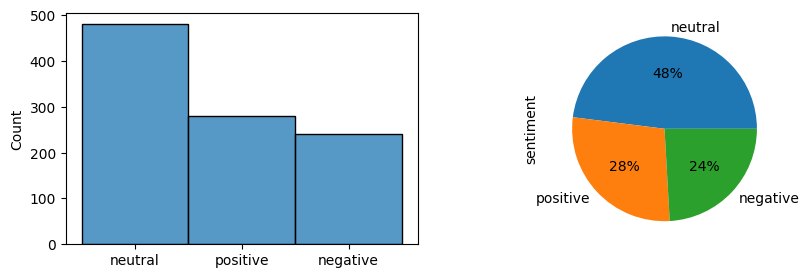

In [28]:
from matplotlib import colors
import seaborn as sns

pi_df = pi

doc_sentiment = pi_df.idxmax(axis=1).map(lambda x: "positive" if x == "S0" else ("negative" if x == "S2" else "neutral"))
#doc_sentiment.loc[pi_df["S0"] == 0.5] = "neutral"

reviews_df["sentiment"] = doc_sentiment

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(x=doc_sentiment, ax=axes[0])

counts = doc_sentiment.value_counts()
counts.plot(
    ax=axes[1],
    kind="pie",
    ylabel='sentiment',
    #colors=sns.color_palette("pastel")[0:7],
    autopct="%.0f%%",
)